In [1]:
import sys
import os
import numpy as np
import itertools
import random
%matplotlib qt
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from trees import kd

In [2]:
def dynamic_print(data):
    sys.stdout.write("\r\x1b[K" + data)
    sys.stdout.flush()

In [3]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

In [4]:
def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    positive = plt_data_t("Positive Class", number_of_points)
    negative = plt_data_t("Negative Class", number_of_points)

    plt.title("DATA", fontsize=10)
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")

    plt.draw()
    return positive, negative

In [5]:
train_positive, train_negative= get_data(10)
train_data = list()

for point in train_positive[:-1]:
    train_data.append((tuple(point.tolist()), 1))

for point in train_negative[:-1]:
    train_data.append((tuple(point.tolist()), 2))
    


In [6]:
test_positive, test_negative= get_data(5)

test_data = list()

for point in test_positive[:-1]:
    test_data.append((point.tolist(), 1))

for point in test_negative[:-1]:
    test_data.append((point.tolist(), 2))


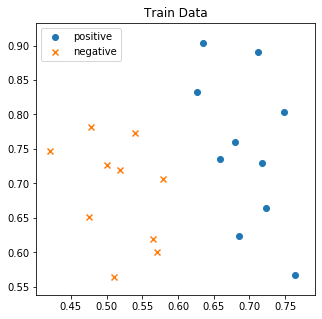

In [7]:
plt.close()
%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(train_positive[:, 0], train_positive[:, 1], marker="o", label="positive")
plt.scatter(train_negative[:, 0], train_negative[:, 1], marker="x", label="negative")
plt.title("Train Data")
plt.legend(loc="upper left")
plt.show()

In [8]:
kd_tree = kd.KDTree(2, train_data)

In [9]:
class_1_prediction = list()
class_2_prediction = list()

for test_point in test_data:
    neighbour, label, mindistance = kd_tree.nearest_neighbor(test_point[0])
    if label == 1:
        class_1_prediction.append(test_point[0])
    elif label == 2:
        class_2_prediction.append(test_point[0])


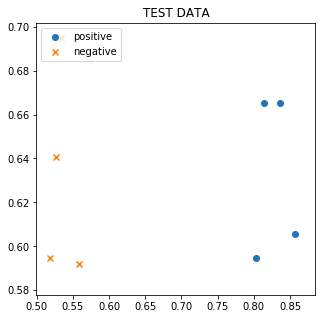

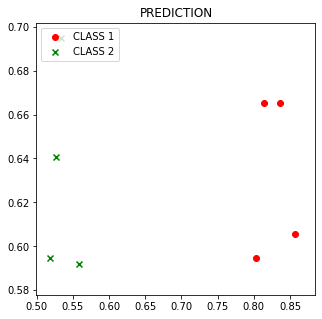

In [10]:
plt.close()
%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(test_positive[:-1, 0], test_positive[:-1, 1], marker="o", label="positive")
plt.scatter(test_negative[:-1, 0], test_negative[:-1, 1], marker="x", label="negative")
plt.title("TEST DATA")
plt.legend(loc="upper left")
plt.show()

%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 5)

c1_x, c1_y = zip(*class_1_prediction)
c2_x, c2_y = zip(*class_2_prediction)
plt.scatter(c1_x, c1_y, marker="o", label="CLASS 1", c="red")
plt.scatter(c2_x, c2_y, marker="x", label="CLASS 2", c="green")
plt.title("PREDICTION")
plt.legend(loc="upper left")
plt.show()